<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0630/01_cnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 CNN Basic Modeling

In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__

'2.11.0'

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

## 1. 데이터 로드 및 탐색

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


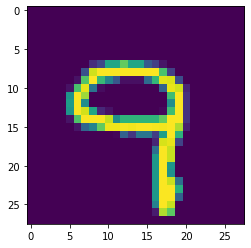

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[10004])
plt.show()

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# conv layer에 넣어주기 위해서 28x28을 28x28x1 형태로 변경해야한다.
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

In [ ]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### 2. 모델 구축
- Filtering 층과 Classification 층으로 구분
- Filtering 층 : Dense 대신 Conv2D, MaxPooling2D 사용
    - Conv2D :
        - filter개수
        - filter_size
        - stride : default = 1
    - MaxPooling2D :
        - filter_size
        - stride : default = filter_size

- model.summary()
    - 모델 구조, weight 개수 세기 정답지
    - Output Shape : 피처맵
    - param # : weight 개수

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [ ]:
train_labels[0]

5

In [ ]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 학습
model.fit(train_images, train_labels, epochs=30, validation_split=0.2, verbose=1, batch_size=64)

Epoch 1/30
750/750 [==============================] - 7s 6ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0771 - val_accuracy: 0.9818
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0369 - val_accuracy: 0.9924
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0412 - val_accuracy: 0.9905
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0356 - val_accuracy: 0.9927
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0477 - val_accuracy: 0.9906
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0419 - val_accuracy: 0.9918
Epoch 

In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0359 - accuracy: 0.9879 - 950ms/epoch - 3ms/step
0.9879000186920166


## cifar10 dataset 실습

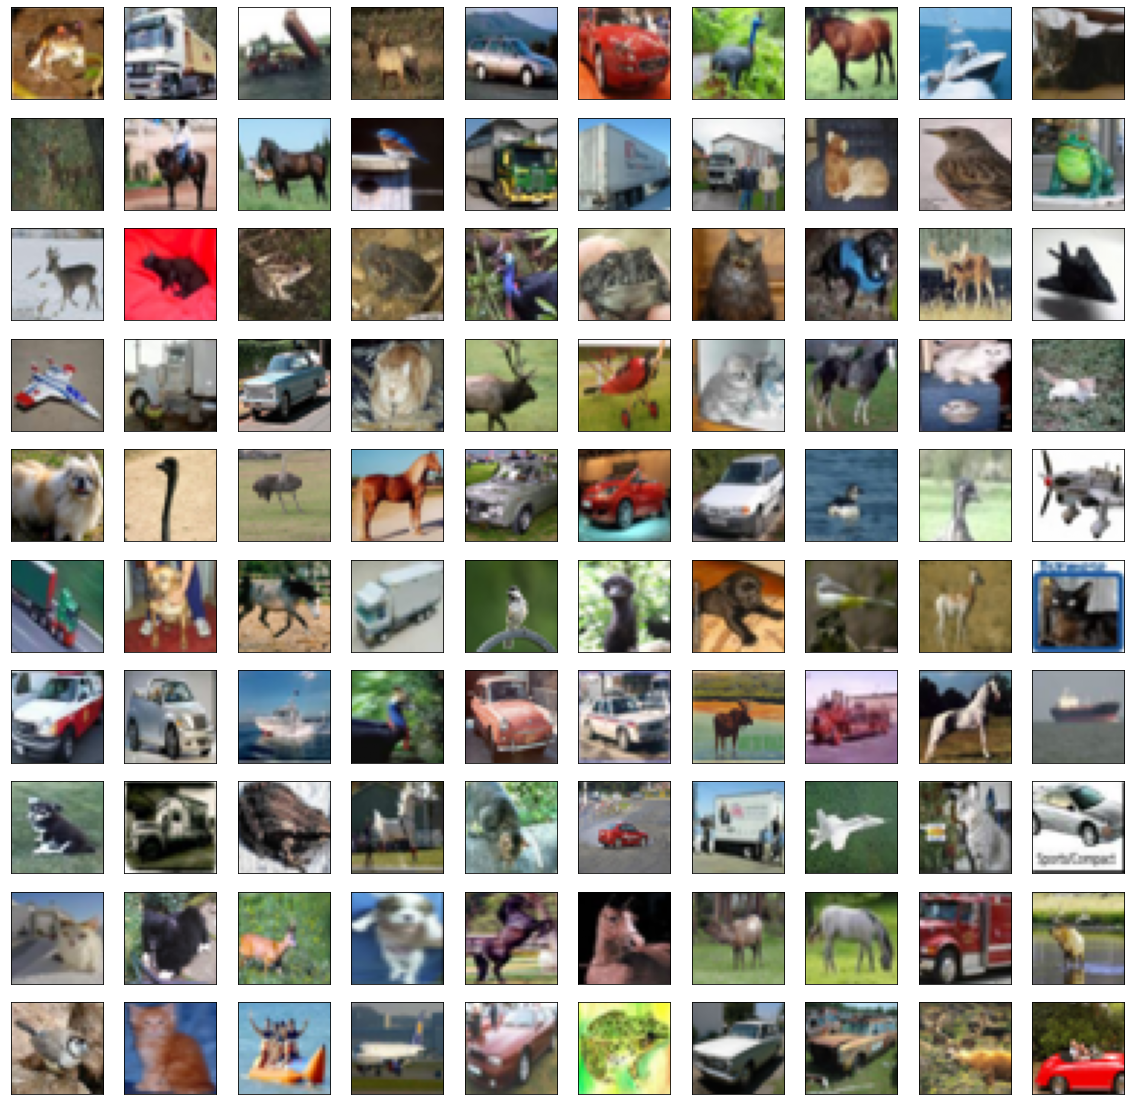

In [ ]:
from matplotlib import pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32,32,3))
test_images = test_images.reshape((10000, 32,32,3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.4466 - accuracy: 0.4706
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0092 - accuracy: 0.6458
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8193 - accuracy: 0.7117
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6738 - accuracy: 0.7624
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5419 - accuracy: 0.8072
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4281 - accuracy: 0.8473
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3212 - accuracy: 0.8870
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2495 - accuracy: 0.9133
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2049 - accuracy: 0.9275
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.6094 - accuracy: 0.4010
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1496 - accuracy: 0.5882
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9451 - accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8009 - accuracy: 0.7146
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6978 - accuracy: 0.7533
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6162 - accuracy: 0.7820
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5452 - accuracy: 0.8076
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4853 - accuracy: 0.8294
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4239 - accuracy: 0.8489
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 19s 10ms/step - loss: 2.3029 - accuracy: 0.0983
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0970
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 9/10
 512/1563 [========>.....................] - ETA: 11s - loss: 2.3027 - accuracy: 0.0988

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 flatten_1 (Flatten)         (None, 4096)             